You've been given a file helpfully named `fakeData.txt`. Your mission, should you choose to accept it, is to:

- Read in that file
- Seperate it into two sets using the "bad" column (-1 means bad)
- Plot the good data
- Plot the bad data using "X"s to clearly denote it
- Fit a line to the data using an appropriate polynomial function

You should accept the mission, it is a completion grade. The purpose of this assignment is to see how much you remember from your intro to programming class, and to see if you developed and very good or very bad habits. Please do your best to demonstrate good habits! (e.g., descriptive variable names, readable code, maybe even proper PEP 8 coding style!)

You may use any resources at your disposal, except your friends please. I want to see what **YOU** remember. But your textbook, the internet, any lecture notes or homework you have from your previous all, are all free game as reference for this assignment. Just try to avoid copy-pasting too much (I'll be able to tell).

In [8]:
import numpy as np
#this reference NEEDS to change, sorry I'm not too comfortable with relative paths just yet!
rough_array = np.genfromtxt('/home/anthonygerg/Downloads/Gerg-50733/Homework0/fakeData.txt',dtype=None, skip_header = 1,delimiter = ',')
rounded_list = []
for i in range(len(rough_array)):
    rounded_x_val = round(rough_array[i][0],2)
    rounded_y_val = round(rough_array[i][1],2)
    rounded_indicator = round(rough_array[i][2])
    rounded_list += [[rounded_x_val,rounded_y_val, rounded_indicator]]
    
#print(rounded_list) #just checking to make sure my list dimensions is correct
rounded_array = np.array(rounded_list)
print(rounded_array)

[[-3.280000e+00  5.430000e+00  1.000000e+00]
 [ 6.620000e+00  4.080000e+00  1.000000e+00]
 [ 8.740000e+00  8.660000e+00  1.000000e+00]
 [ 8.740000e+00  9.420000e+00  1.000000e+00]
 [ 9.600000e-01  1.279000e+01  1.000000e+00]
 [ 7.560000e+00  1.402000e+01  1.000000e+00]
 [ 2.320000e+00  1.838000e+01  1.000000e+00]
 [-1.590000e+00  2.266000e+01  1.000000e+00]
 [ 8.810000e+00  2.563000e+01  1.000000e+00]
 [ 8.100000e+00  3.308000e+01  1.000000e+00]
 [ 8.800000e-01  3.861000e+01  1.000000e+00]
 [ 1.342000e+01  4.653000e+01  1.000000e+00]
 [ 6.830000e+00  5.415000e+01  1.000000e+00]
 [ 3.570000e+00  5.620000e+01  1.000000e+00]
 [ 1.193000e+01  6.345000e+01  1.000000e+00]
 [-3.800000e-01  7.169000e+01  1.000000e+00]
 [ 5.670000e+00  8.433000e+01  1.000000e+00]
 [ 2.030000e+00  9.544000e+01  1.000000e+00]
 [ 7.000000e+00  1.025500e+02  1.000000e+00]
 [ 5.920000e+00  1.122700e+02  1.000000e+00]
 [ 1.313000e+01  1.227600e+02  1.000000e+00]
 [ 6.180000e+00  1.311600e+02  1.000000e+00]
 [ 1.04000

In [4]:
bad_data_list = []
good_data_list = []
#This for loop is separating the good and bad data, nothing too crazy
for i in range(len(rounded_array)):
    if rounded_array[i][2] == -1.:
        bad_data_list.append(rounded_array[i])
    else:
        good_data_list.append(rounded_array[i])
        
#Creating arrays from my lists, maybe not needed but I hate lists
bad_data_array = np.array(bad_data_list)
good_data_array = np.array(good_data_list)

#Paritioning the array into x and y values for both good and bad data
x_values_bad_data = bad_data_array[:,0]
y_values_bad_data = bad_data_array[:,1]

x_values_good_data = good_data_array[:,0]
y_values_good_data = good_data_array[:,1]

NameError: name 'rounded_array' is not defined

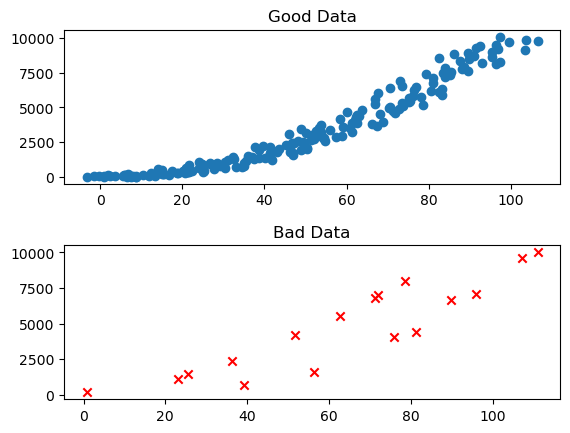

In [126]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 2, ncols = 1)

axs1 = axs[0]
axs1.scatter(x_values_good_data,y_values_good_data)
axs1.set_title("Good Data")

axs2 = axs[1]
axs2.scatter(x_values_bad_data, y_values_bad_data,marker = 'x',color = 'r')
axs2.set_title("Bad Data")
fig.subplots_adjust(hspace = 0.4)

In [127]:
import scipy.optimize as opt

#Creating a polynomial to curvefit to
def polynomial(x,a,b,c):
    return a*x**2 + b*x +c

good_popt, good_pcov = opt.curve_fit(polynomial,x_values_good_data, y_values_good_data)


bad_popt, bad_pcov = opt.curve_fit(polynomial,x_values_bad_data,y_values_bad_data)
#print(good_popt) Here I was making sure I got the correct amount of parameters and everything was in line

#Finding y values from our polynomial function
y_values_good_fitted = polynomial(x_values_good_data,good_popt[0],good_popt[1],good_popt[2])
y_values_bad_fitted = polynomial(x_values_bad_data,bad_popt[0],bad_popt[1],bad_popt[2])

[   0.87900929   12.01484675 -132.43862672]


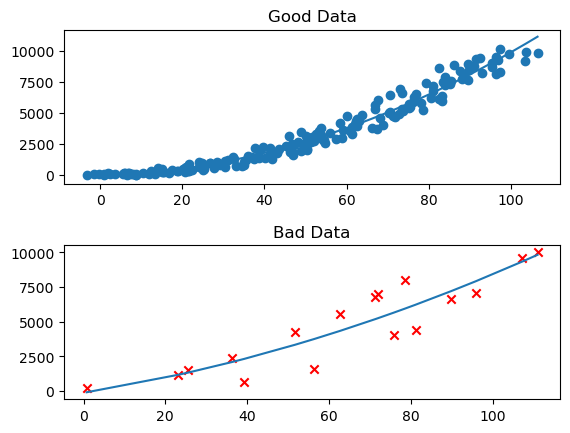

In [128]:
#redefining figure could've found a way to just tack onto the previous but this seemed quicker and easier(to myself at least)
fig,axs = plt.subplots(nrows = 2, ncols = 1)
axs1 = axs[0]
axs2 = axs[1]

#Doing plots BEFORE sorting, IMPORTANT to NOT run this cell twie in a row, will give incorrect plots
axs1.scatter(x_values_good_data,y_values_good_data)
axs2.scatter(x_values_bad_data, y_values_bad_data,marker = 'x',color = 'r')

#Sorting y values so the lines look correct
x_values_good_data.sort()
y_values_good_fitted.sort()
x_values_bad_data.sort()
y_values_bad_fitted.sort()

#Plotting the fitted lines
axs1.plot(x_values_good_data,y_values_good_fitted)
axs1.set_title("Good Data")
axs2.plot(x_values_bad_data,y_values_bad_fitted)
axs2.set_title("Bad Data")
fig.subplots_adjust(hspace = 0.4)

In [121]:
#I know this makes the data unusable data after I sort it, but I feel it is fine. 
#I could make a new array, copy the unsorted values to said array, and then sort as well.